In [1]:
''' LINEAR ALGEBRA '''
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
''' DATA VISUALISATION '''
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
import imageio

In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
df = pd.read_csv('../raw_data/full_df.csv')

In [7]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [8]:
IMAGE_PATH = "../raw_data/preprocessed_images"

In [9]:
image_path = os.path.join(IMAGE_PATH, df['filename'][1])

In [10]:
img_data=imageio.imread(image_path)

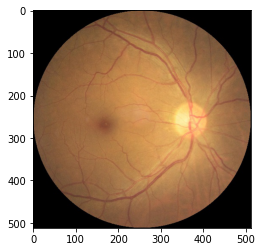

In [11]:
plt.imshow(img_data)

In [12]:
df_1 = df.copy()

In [13]:
df_1['filepath_proc'] = IMAGE_PATH + '/' + df_1['filename']

In [14]:
img_data=imageio.imread(df_1['filepath_proc'][1])

In [15]:
img_data.shape

(512, 512, 3)

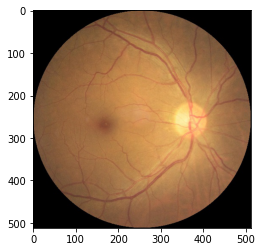

In [16]:
plt.imshow(img_data)

In [17]:
df_1.shape

(6392, 20)

##### Recup every image with the good shape

In [20]:
img_data = []

for i in range(len(df_1)):
    img_data.append(imageio.imread(df_1['filepath_proc'][i]))

In [22]:
img_data_array = np.array(img_data)

In [25]:
img_data_array.shape

(6392, 512, 512, 3)

###### Resize image in 255 x 255

In [26]:
from skimage.transform import resize

In [29]:
new_width  = 255
new_height = 255
for u in range(len(img_data)):
    img_data[u] = resize(img_data[u],(new_width, new_height))

In [34]:
img_data_array_1 = np.array(img_data)

In [35]:
img_data_array_1.shape

(6392, 255, 255, 3)

new_width  = 255
new_height = 255
for u in range(len(img_data_array)):
    img_data_array[u] = img_data_array[u].resize((new_width, new_height))

In [38]:
X = img_data_array_1[:500]

In [ ]:
X.shape

In [39]:
y = df_1['C'][:500]

In [ ]:
y.shape

In [51]:
y.value_counts(1)

0    0.964
1    0.036
Name: C, dtype: float64

In [55]:
type(X)

numpy.ndarray

In [56]:
type(y)

pandas.core.series.Series

## CNN

### Baseline model

##### Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

X_train = X_train / 255
X_test = X_test / 255

def initialize_model():
    ### First convolution & max-pooling
    model = models.Sequential()
    
    model.add(layers.Conv2D(8, (4,4), input_shape=(255, 255, 3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    ### Flattening
    model.add(layers.Flatten())
    ### One fully connected
    model.add(layers.Dense(10, activation='relu'))
    ### Last layer (let's say a classification with 10 output)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model compilation
    model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

    return model

model = initialize_model()
es = EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=10,
                    batch_size=16, 
                    verbose=1,
                    callbacks=[es])

In [50]:
y_train.value_counts(1)

0    0.971429
1    0.028571
Name: C, dtype: float64

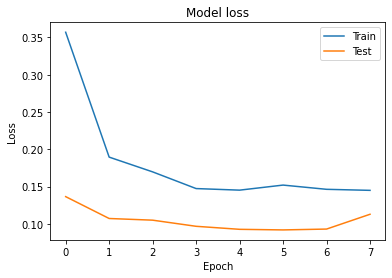

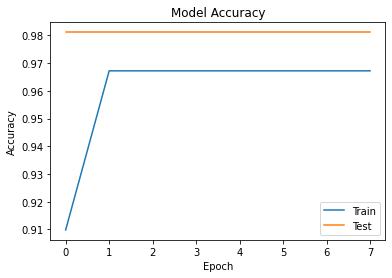

In [54]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    
### YOUR CODE HERE
plot_loss_accuracy(history)